In [14]:
import pandas as pd
import json
import re
import random
import matplotlib.pyplot as plt

In [15]:
with open('TWEETS.json') as f:
    TWEETS = json.load(f)
how_many_tweets = {}
for celeb in TWEETS.keys():
    how_many_tweets[celeb] =len(TWEETS[celeb].keys())

In [16]:
how_many_tweets

{'realDonaldTrump': 100,
 'rickygervais': 300,
 'barackobama': 300,
 'jeffbezos': 241,
 'billgates': 300,
 'melindagates': 300,
 'beyonce': 16,
 'shakira': 300,
 'jack': 300,
 'elonmusk': 300,
 'charlizeafrica': 300,
 'jlo': 300,
 'loganpaul': 300,
 'neiltyson': 300}

In [17]:
def clean_word(word):
    pattern = re.compile('[\W]+')
    return pattern.sub(' ', word.lower()) 

In [18]:
for celeb in TWEETS.keys():
    tweets = []
    for tweet_id in TWEETS[celeb]:
        tweet = TWEETS[celeb][tweet_id]
        tweet = clean_word(tweet).split(" ")
        for word in tweet:
            if "http" in word or "www" in word or "youtu.be" in word:
                
                pass
            elif len(word)>1:
                tweets.append(word)
    
    TWEETS[celeb]= tweets

In [19]:
freq = {}
for celeb in TWEETS.keys():
    unique_ = len(set(TWEETS[celeb]))
    all_ = len(TWEETS[celeb])
    freq[celeb] = [all_,unique_,unique_/float(all_)]

In [20]:
file = open("information.txt","r").readlines()
for i in file:
    username = i.split("\t")[1][1:]
    gender = i.split("\t")[2]
    age = i.split("\t")[3].strip()
    freq[username].append(gender)
    freq[username].append(age)
    

In [21]:
data = [[i,freq[i][0],freq[i][1],freq[i][2],freq[i][3],freq[i][4]] for i in freq]

In [22]:
df = pd.DataFrame(data,columns=["names","total_words","unique_words","ratio","gender","age"])

In [23]:
freq100 = {}
for celeb in TWEETS.keys():
    try:
        wordss = random.sample(TWEETS[celeb],1000)
        unique_ = len(set(wordss))
        all_ = len(wordss)
        f = unique_/float(all_)
        freq100[celeb] = f
        
    except:
        freq100[celeb] = 0

In [24]:
df["unique_per1000"] = list(freq100.values())

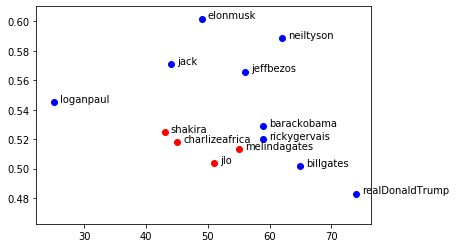

In [25]:

for i in range(14): 
    row = df.iloc[i:i+1,:]
    name = row.names[i]
    age = int(row.age[i])
    gender = row.gender[i]
    un = row.unique_per1000[i]
    if name !="beyonce":
        if gender == "male":
            plt.scatter(age,un,color="blue")
            plt.text(age+1,un,name)
        else:
            plt.scatter(age,un,color="red")
            plt.text(age+1,un,name)
